<a href="https://colab.research.google.com/github/ayumnaf/CaseStudy2_Kelompok6_A/blob/main/CaseStudy2_Kelompok6_KelasA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CASE STUDY 2 - CLUSTERING**#

#**Data Mining and Business Intelligence**


**Anggota Kelompok 6 Kelas A**
- Alfia Choirun Nisa (1906299414)
- Anatasya Oktaviani Handriati  (1906296186)
- Athaya Yumna Fathiyah (1906296192)
- Chika Ramadhani (1906374004)
- Hana Adzania Nufaisah (1906377776)
- Nabila Safitri (1906299540)
- Rahmi Radhia Khalqi (1906375796)
- Vania Adisaputri  (1906296362)

**Import data excel ke dalam google colab melalui link github**

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ayumnaf/CaseStudy2_Kelompok6_A/main/CaseStudy2.csv')
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49.00,13114754.0,52.0,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32.00,33606557.0,86.0,1,Depok,1.0,Minggu,6
2,103,Pria,51.00,15983606.0,41.0,1,Jakarta,2.0,Minggu,3
3,104,Pria,19.00,12704918.0,55.0,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38.00,20081967.0,42.0,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31.00,4098360.0,73.0,1,Depok,1.0,Senin,0
196,297,Pria,57.00,15983606.0,51.0,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35.00,43032786.0,79.0,1,Depok,1.0,Senin,7
198,299,Wanita,23.00,1229508.0,94.0,1,Depok,0.0,Selasa,0


**Mencari tau tipe-tipe data tiap kolom yang ada pada data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    float64
 4   skor-pengeluaran      200 non-null    float64
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 15.8+ KB


**Membuang Kolom ID**

In [ ]:
df.drop("ID",axis=1,inplace=True)
df.head()

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49.00,13114754.0,52.0,1,Jakarta,1.0,Sabtu,2
1,Wanita,32.00,33606557.0,86.0,1,Depok,1.0,Minggu,6
2,Pria,51.00,15983606.0,41.0,1,Jakarta,2.0,Minggu,3
3,Pria,19.00,12704918.0,55.0,0,Jakarta,1.0,Rabu,7
4,Wanita,38.00,20081967.0,42.0,1,Jakarta,2.0,Senin,8


**Melihat banyaknya missing values**

In [ ]:
df.isnull().sum()

Jenis Kelamin            4
Umur                     0
Pendapatan-per-bulan     0
skor-pengeluaran         0
Menikah                 12
Kota                     0
Promo                    6
HariFav                  0
FavFlavor                0
dtype: int64

**Memeriksa data setiap kolom**

In [ ]:
df['Jenis Kelamin'].value_counts()

Wanita    109
Pria       86
-           1
Name: Jenis Kelamin, dtype: int64

In [ ]:
df['Menikah'].value_counts()

1    160
0     26
       1
-      1
Name: Menikah, dtype: int64

In [ ]:
df['Promo'].value_counts()

1.0    86
3.0    50
2.0    43
0.0    14
5.0     1
Name: Promo, dtype: int64

In [ ]:
df['Kota'].value_counts()

Jakarta      87
Depok        59
Tangerang    53
JJakarta      1
Name: Kota, dtype: int64

In [ ]:
df['Umur'].value_counts()

32.00    11
35.00     8
31.00     8
49.00     8
19.00     8
47.00     7
30.00     7
38.00     6
50.00     6
27.00     6
36.00     6
40.00     6
48.00     6
23.00     6
54.00     5
29.00     5
34.00     5
20.00     5
21.00     5
59.00     4
46.00     4
43.00     4
28.00     4
24.00     4
45.00     4
58.00     3
60.00     3
52.00     3
39.00     3
51.00     3
42.00     3
33.00     3
25.00     3
18.00     3
44.00     3
53.00     3
22.00     3
37.00     3
57.00     3
55.00     2
41.00     2
56.00     2
26.00     2
2.00      1
35'       1
Name: Umur, dtype: int64

In [ ]:
df['FavFlavor'].value_counts()

0    40
2    20
6    20
3    20
7    20
5    20
4    20
1    20
8    19
9     1
Name: FavFlavor, dtype: int64

**Mengubah data yang tidak sesuai penulisan dan kategori**

In [ ]:
import numpy as np
df['Umur'] = df['Umur'].replace("35'","35")
df['Kota'] = df['Kota'].replace("JJakarta","Jakarta")
df['FavFlavor'] = df['FavFlavor'].replace("9",np.NaN)
df['Promo']=df['Promo'].replace("5",np.NaN)
df['skor-pengeluaran'] = df['skor-pengeluaran'].replace("101","100")
df['Menikah'] = df['Menikah'].replace(' ','1')
df['Jenis Kelamin'] = df['Jenis Kelamin'].fillna('Wanita')
df['Menikah'] = df['Menikah'].str.replace('-', '1')
df['Jenis Kelamin'] = df['Jenis Kelamin'].str.replace('-', 'Wanita')

*   Pada kolom Promo nilai '-' diubah menjadi '0', karena diasumsikan '-' berarti tidak pernah menggunakan promo.
*   Pada kolom Menikah nilai '-' diubah menjadi '1', karena modus dari kolom Menikah adalah 1(Menikah).
*   Pada kolom Jenis Kelamin nilai '-' diubah menjadi 'Wanita', karena modus dari kolom Jenis Kelamin adalah 'Wanita'
*   Pada kolom Promo missing values diubah menjadi '0', karena diasumsikan tidak pernah menggunakan promo.
*   Pada kolom Menikah missing values diubah menjadi '1', karena modus dari kolom Menikah adalah 1(Menikah).
*   Pada kolom Jenis Kelamin missing values diubah menjadi 'Wanita', karena modus dari kolom Jenis Kelamin adalah 'Wanita'.
*   Mengubah 35' menjadi 35 pada kolom umur karena diasumsikan terjadi kesalahan penulisan.
*   Mengubah JJakarta menjadi Jakarta karena diasumsikan terjadi kesalahan penulisan.



In [ ]:
df=df.dropna() #Menghapus missing values 

**Mengubah tipe data tiap kolom**

In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].astype('int64') #pendapatan perbulan itu tipe datanya apa ya? atau float64?
df['Menikah']=df['Menikah'].astype('category')
df['Kota']=df['Kota'].astype('category')
df['Promo']=df['Promo'].astype('category')
df['HariFav']=df['HariFav'].astype('category')
df['FavFlavor']=df['FavFlavor'].astype('category')
df['Umur']=df['Umur'].astype('float64')
df['skor-pengeluaran']=df['skor-pengeluaran'].astype('int64')
df.dtypes

Jenis Kelamin           category
Umur                     float64
Pendapatan-per-bulan       int64
skor-pengeluaran           int64
Menikah                 category
Kota                    category
Promo                   category
HariFav                 category
FavFlavor               category
dtype: object

- Variabel jenis Kelamin diubah menjadi tipe datanya dari objek menjadi kategori karena terdiri dari kategori wanita dan pria

- Variabel Pendapatan perbulan diubah dari float menjadi integer karena merupakan data diskrit

- Variabel Menikah diubah dari objek menjadi kategori

- Variabel Kota diubah dari objek menjadi kategori 

- Variabel Promo diubah dari float menjadi kategori 

- Variabel HariFav diubah dari objek menjadi kategori 

- Variabel  FavFlavor diubah dari integer menjadi kategori 

- Variabel Umur diubah dari objek menjadi integer karena merupakan data diskrit (tidak ada nilai umur yang 30.6)

**Mengecek Duplikasi  dan Missing Values Data**

In [ ]:
df.isnull().sum()

Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Dapat dilihat tidak ada missing value dan data yang duplikat

In [ ]:
df

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49.0,13114754,52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32.0,33606557,86,1,Depok,1.0,Minggu,6
2,Pria,51.0,15983606,41,1,Jakarta,2.0,Minggu,3
3,Pria,19.0,12704918,55,0,Jakarta,1.0,Rabu,7
4,Wanita,38.0,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31.0,4098360,73,1,Depok,1.0,Senin,0
196,Pria,57.0,15983606,51,1,Jakarta,1.0,Minggu,5
197,Wanita,35.0,43032786,79,1,Depok,1.0,Senin,7
198,Wanita,23.0,1229508,94,1,Depok,0.0,Selasa,0


#**Exploratory Data Analysis**#

**JENIS KELAMIN**

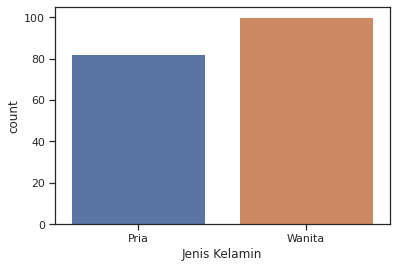

In [ ]:
import matplotlib.pyplot as plt, seaborn as sns
sns.countplot(x = "Jenis Kelamin", data = df)

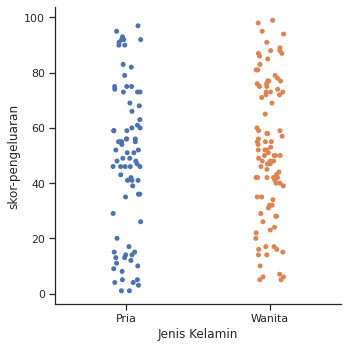

In [ ]:
p= sns.catplot(x="Jenis Kelamin", y="skor-pengeluaran", data=df)

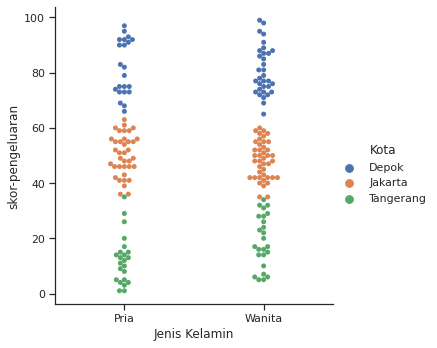

In [ ]:
p= sns.catplot(x="Jenis Kelamin", y="skor-pengeluaran", hue="Kota", kind="swarm", data=df)

Berdasarkan grafik di atas, skor pengeluaran paling tinggi terjadi di kota **Depok**, warga kota depok memiliki tingkat pengeluaran di MixItUp yang paling besar. Sehingga, bisa disarankan untuk membuka lebih banyak cabang di Kota Depok. Namun untuk menambah cabang di Kota Depok, sebaiknya mempertimbangkan banyak penjualan di masing-masing cabang yang ada di kota Depok.

KOTA

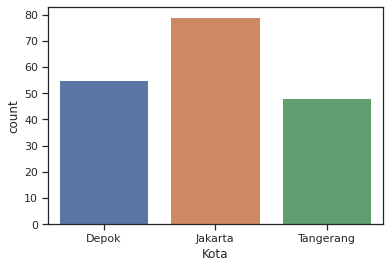

In [ ]:
sns.countplot(x = "Kota", data = df)

Di Kota Jakarta, terdata banyak pembeli yang mendaftarkan loyality programnya. Maka, dapat digencarkan kembali promosi untuk mendaftar loyality program.

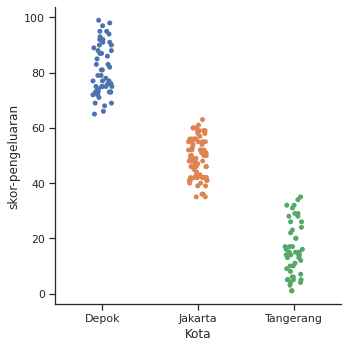

In [ ]:
p= sns.catplot(x="Kota", y="skor-pengeluaran", data=df)

JENIS RASA ES KRIM

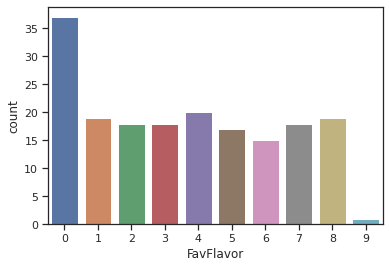

In [ ]:
sns.countplot(x = "FavFlavor", data = df)

Berdasarkan grafik di atas, dapat dilihat eskrim yang paling banyak dibeli adalah vanilla.

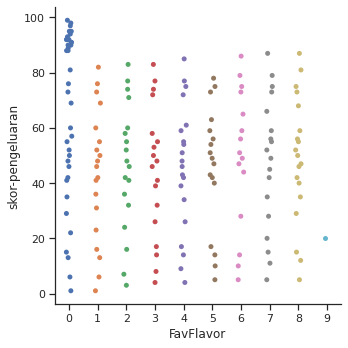

In [ ]:
p= sns.catplot(x="FavFlavor", y="skor-pengeluaran", data=df)

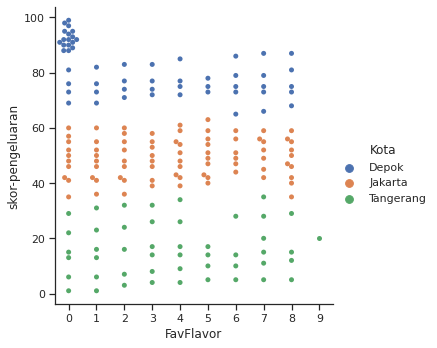

In [ ]:
p= sns.catplot(x="FavFlavor", y="skor-pengeluaran", hue="Kota", kind="swarm", data=df)

Depok suka rasa vanilla, sedangkan kota lain distribusi rasa fav nya menyebar merata
Sehingga dapat diperbanyak stock persedian es krim vanilla di kota Depok

Bisa juga dengan membuat promo di rasa es krim lainnya sehingga skor pengeluarannya makin tinggi

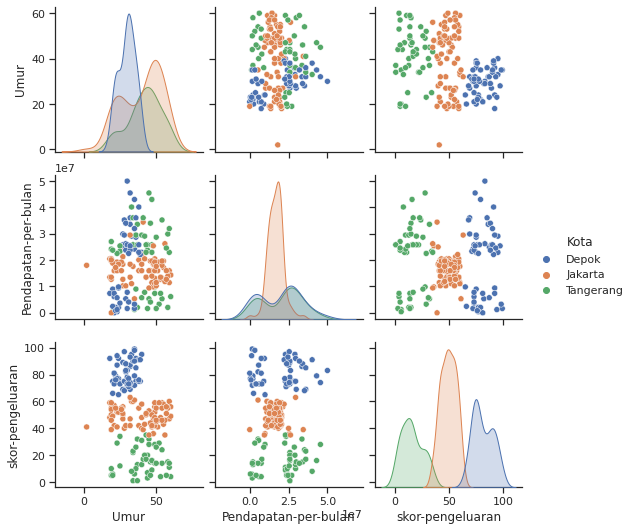

In [ ]:
g = sns.pairplot(df, hue="Kota")

PENDAPATAN

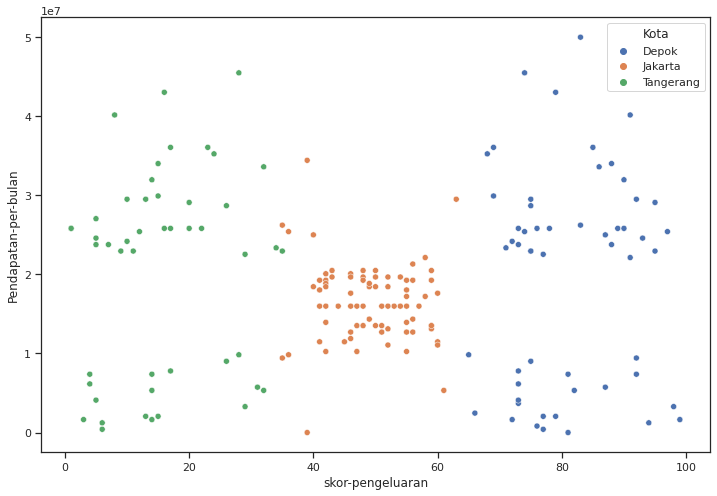

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
p = sns.scatterplot(x=df['skor-pengeluaran'], y=df['Pendapatan-per-bulan'], hue = df['Kota'])

gaji setiap pembeli dari kota jakarta paling banyak di kisaran 10 jt - 25 jt an, sedangkan gaji pembeli dari kota depok dan kota tangerang di kisaran kurang dari 10 jt dan lebih dari 20 jt. Agar skor pengeluaran di kota lebih tinggi, bisa meningkatkan promosi untuk lebih mengenalkan produknya. Promosi tersebut bisa melalui medsos dan bazaar.

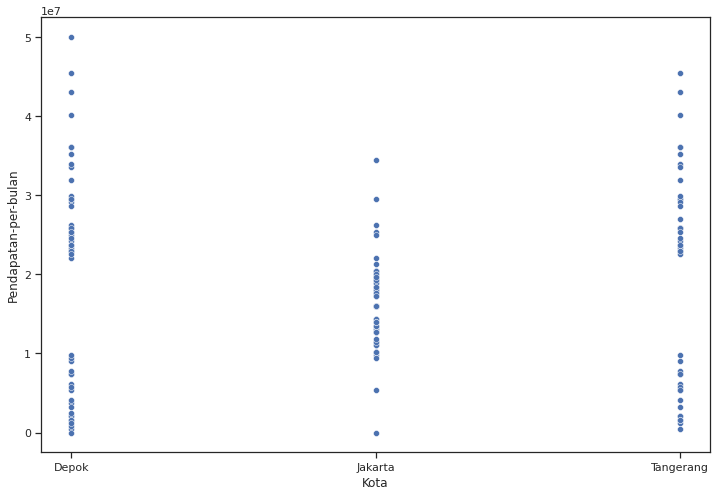

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
p = sns.scatterplot(x=df['Kota'], y=df['Pendapatan-per-bulan'])

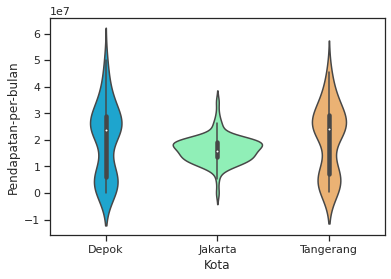

In [ ]:
p = sns.violinplot(x="Kota", y="Pendapatan-per-bulan", data=df, palette='rainbow')

Pembeli di Kota Depok kisaran di umur 10 - 45 tahun atau didominasi oleh anak muda yang yang berumur 20 - 35 tahun. 

Untuk kota Jakarta memiliki pembeli yang umurnya bervariasi, tetapi di dominasi oleh pembeli yang berumur 40-60 tahun.

Sedangkan, Kota Tangerang memiliki pembeli yang kisarannya di 10 -70 tahun tetapi didominasi oleh 30 - 50 tahun.

**Insight** = Mungkin **alasan kenapa skor pengeluaran di Kota Tangerang lebih sedikit** dibanding kota lainnya adalah **pembeli yang kebanyakan umurnya sudah tua**. Pembeli yang berumur 30 - 50 tahun di **Kota Tangerang tidak tertarik untuk membeli produk MixItUp**

Sedangkan **kota Depok didominasi oleh anak muda** yang umurnya 20 - 35 tahun sehingga **produk kita lebih laris** berdasarkan skor pengeluaran.

UMUR

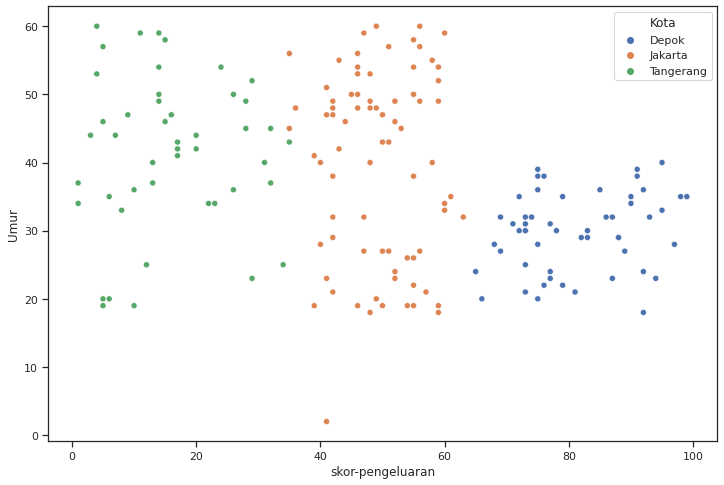

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
p = sns.scatterplot(x=df['skor-pengeluaran'], y=df['Umur'], hue = df['Kota'])

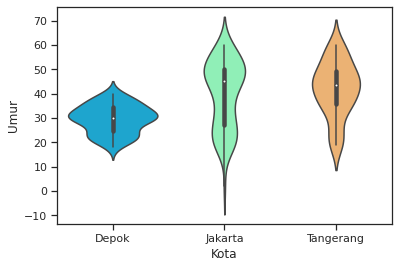

In [ ]:
p = sns.violinplot(x="Kota", y="Umur", data=df, palette='rainbow')

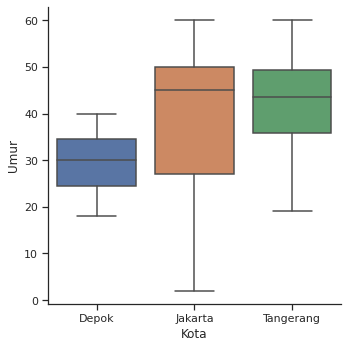

In [ ]:
p = sns.catplot(x="Kota", y="Umur", kind="box", data=df)

HARI FAVORIT

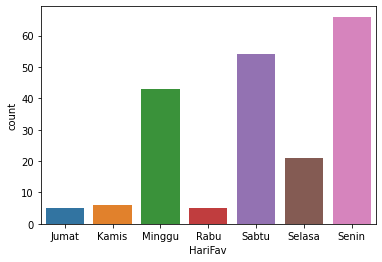

In [ ]:
sns.countplot(x = "HariFav", data = df)

Hari favorit pembeli paling banyak pada hari Senin, Sabtu dan Minggu. Sedangkan hari Jum'at, Kamis dan Rabu sedikit pembeli yang menyukainya.

Insight: **Perbanyak pegawai dan stok** produk di hari **Senin, Sabtu dan Minggu**. Kebalikannya, kurangi shift pegawai di hari **rabu - jum'at**

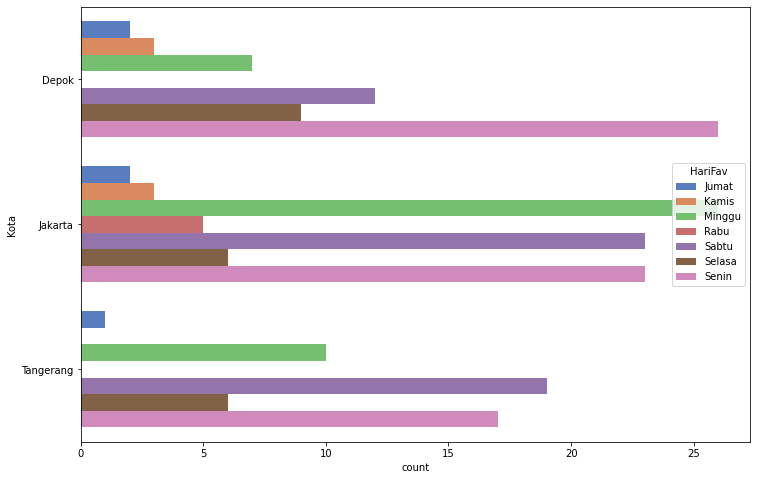

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax = sns.countplot(y = 'Kota', hue = 'HariFav', palette = 'muted', data=df)

Di **Kota Depok**, pembeli **sering berkunjung** pada hari **Senin**. Oleh karena itu, perbanyak pegawai dan stok es krim pada hari Senin. Untuk **hari yang sepi**, yaitu hari **Rabu, Jum'at dan Kamis**, bisa dibuat promo untuk es krim yang rasanya paling favorit (kita tahu vanilla rasa yang paling laku di Depok)

Untuk **Kota Jakarta**, pembeli **sering berkunjung** pada hari **Minggu, Sabtu, dan Senin**. Oleh karena itu, perbanyak pegawai dan stok es krim pada hari tersebut. Untuk **hari yang sepi**, yaitu hari **Rabu, Jum'at dan Kamis**, bisa dibuat promo.

Untuk **Kota Tangerang**, pembeli **sering berkunjung** pada hari **Sabtu, Senin dan Minggu**. Oleh karena itu, perbanyak pegawai dan stok es krim pada hari tersebut. Untuk **hari yang sepi**, yaitu hari **Rabu, Kamis dan Jum'at**, bisa dibuat promo.

# CLUSTERING (MARKET SEGMENTATION)

Akan dilakukan clustering untuk dapat melakukan market segmentation. Hal ini 
dilakukan untuk meningkatkan efektivitas strategi pemasaran produk ataupun layanan dari MixITup. Clustering akan dilakukan dengan metode K-Means

Akan diimport beberapa module yang dibutuhkan terlebih dahulu.

In [ ]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !pip install --upgrade umap-learn
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Installing the required modules
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-07 08:20:15--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.2’

tau_unsup.py.2      100%[===================>]  16.98K  --.-KB/s    in 0s      

2022-10-07 08:20:15 (98.1 MB/s) - ‘tau_unsup.py.2’ saved [17387/17387]



In [ ]:
# Importing Modules untuk Mengcluste di notebook ini
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

Perhatikan bahwa terdapat variabel kategorik Jenis Kelamin, Menikah, Kota, Promo, HariFav, dan FavFlavor, sehingga akan dilakukan transformasi terlebih dahulu menggunakan one hot encoding agar dapat dilakukan perhitungan pada algoritma K-Means, sebagai berikut.

In [ ]:
df= pd.get_dummies(df)
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,188,189,191,192,193,195,196,197,198,199
Umur,49.0,32.0,51.0,19.0,38.0,33.0,27.0,24.0,32.0,21.0,...,56.0,57.0,22.0,31.0,54.0,31.0,57.0,35.0,23.0,50.0
Pendapatan-per-bulan,13114754.0,33606557.0,15983606.0,12704918.0,20081967.0,29098360.0,21311475.0,2049180.0,13524590.0,19262295.0,...,11885245.0,12704918.0,819672.0,22540983.0,19672131.0,4098360.0,15983606.0,43032786.0,1229508.0,1639344.0
skor-pengeluaran,52.0,86.0,41.0,55.0,42.0,95.0,56.0,77.0,47.0,42.0,...,46.0,56.0,76.0,77.0,46.0,73.0,51.0,79.0,94.0,14.0
Jenis Kelamin_Pria,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
Jenis Kelamin_Wanita,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
Menikah_0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Menikah_1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Kota_Depok,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
Kota_Jakarta,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Kota_Tangerang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['Umur']])
df['Umur'] = scaler.transform(df[['Umur']])

scaler.fit(df[['Pendapatan-per-bulan']])
df['Pendapatan-per-bulan'] = scaler.transform(df[['Pendapatan-per-bulan']])

scaler.fit(df[['skor-pengeluaran']])
df['skor-pengeluaran'] = scaler.transform(df[['skor-pengeluaran']])

df

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,0.810345,0.262295,0.51,1,Jakarta,1.0,Sabtu,2
1,Wanita,0.517241,0.672131,0.85,1,Depok,1.0,Minggu,6
2,Pria,0.844828,0.319672,0.40,1,Jakarta,2.0,Minggu,3
3,Pria,0.293103,0.254098,0.54,0,Jakarta,1.0,Rabu,7
4,Wanita,0.620690,0.401639,0.41,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,0.500000,0.081967,0.72,1,Depok,1.0,Senin,0
196,Pria,0.948276,0.319672,0.50,1,Jakarta,1.0,Minggu,5
197,Wanita,0.568966,0.860656,0.78,1,Depok,1.0,Senin,7
198,Wanita,0.362069,0.024590,0.93,1,Depok,0.0,Selasa,0


Text(0, 0.5, 'Pendapatan-per-bulan')

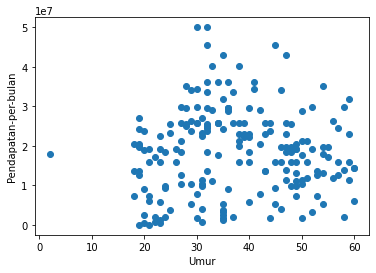

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(df.Umur,df['Pendapatan-per-bulan'])
plt.xlabel('Umur')
plt.ylabel('Pendapatan-per-bulan')

Text(0, 0.5, 'skor-pengeluaran')

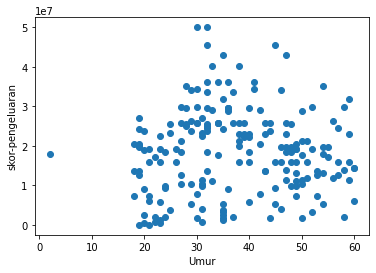

In [ ]:
plt.scatter(df.Umur,df['Pendapatan-per-bulan'])
plt.xlabel('Umur')
plt.ylabel('skor-pengeluaran')

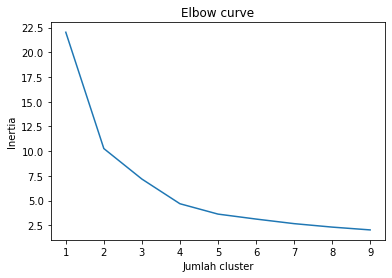

In [ ]:
from sklearn.cluster import KMeans
a = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Umur','skor-pengeluaran']])
    a.append(km.inertia_)
plt.xlabel('Jumlah cluster')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.plot(k_rng,a)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Umur','skor-pengeluaran']])
y_predicted

array([1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 0, 2, 3, 3, 3, 1, 3, 2, 3, 3, 2, 0,
       1, 3, 2, 0, 3, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 3, 2, 2, 3,
       2, 1, 0, 3, 1, 2, 1, 2, 1, 1, 1, 3, 1, 3, 1, 1, 0, 1, 1, 1, 0, 1,
       2, 1, 0, 2, 1, 3, 1, 3, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 3, 0,
       1, 2, 3, 3, 1, 3, 3, 2, 1, 1, 1, 0, 1, 3, 3, 1, 3, 0, 2, 0, 0, 2,
       2, 2, 0, 3, 1, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 2, 2, 1, 0, 1, 3, 2,
       0, 0, 0, 1, 1, 2, 0, 2, 1, 2, 2, 3, 3, 2, 0, 1, 2, 1, 3, 2, 3, 0,
       2, 2, 3, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 3, 1, 0, 2, 3,
       0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 0, 1, 1, 3, 2, 2, 1, 2, 2, 1, 2,
       2, 3], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,cluster
0,Wanita,0.810345,0.262295,0.51,1,Jakarta,1.0,Sabtu,2,1
1,Wanita,0.517241,0.672131,0.85,1,Depok,1.0,Minggu,6,2
2,Pria,0.844828,0.319672,0.40,1,Jakarta,2.0,Minggu,3,1
3,Pria,0.293103,0.254098,0.54,0,Jakarta,1.0,Rabu,7,0
4,Wanita,0.620690,0.401639,0.41,1,Jakarta,2.0,Senin,8,1
...,...,...,...,...,...,...,...,...,...,...
195,Pria,0.500000,0.081967,0.72,1,Depok,1.0,Senin,0,2
196,Pria,0.948276,0.319672,0.50,1,Jakarta,1.0,Minggu,5,1
197,Wanita,0.568966,0.860656,0.78,1,Depok,1.0,Senin,7,2
198,Wanita,0.362069,0.024590,0.93,1,Depok,0.0,Selasa,0,2


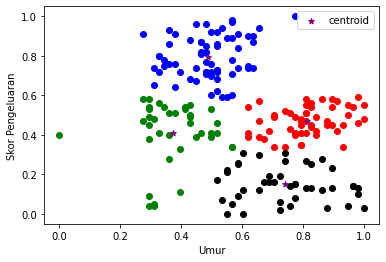

In [ ]:
df['cluster']=y_predicted
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.Umur,df1['skor-pengeluaran'],color='green')
plt.scatter(df2.Umur,df2['skor-pengeluaran'],color='red')
plt.scatter(df3.Umur,df3['skor-pengeluaran'],color='blue')
plt.scatter(df4.Umur,df4['skor-pengeluaran'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Umur')
plt.ylabel('Skor Pengeluaran')
plt.legend()

In [ ]:
df['cluster'].value_counts()

2    65
1    54
3    43
0    38
Name: cluster, dtype: int64

Cluster 0 : konsumen dengan umur menengah dan skor pengeluaran tinggi

Cluster 1 : konsumen dengan umur tinggi dan skor pengeluaran menengah

Cluster 2 : konsumen dengan umur menengah dan skor pengeluaran menengah

Cluster 3 : konsumen dengan umur tinggi dan skor pengeluaran rendah

Berdasarkan grafik dan kode di atas, terdapat 65 konsumen yang berada di cluster 2, dimana jumlah ini merupakan jumlah terbanyak. Artinya, konsumen MixITUp didominasi oleh konsumen dengan umur menengah dan skor pengeluaran menengah. Agar skor pengeluaran meningkat, perusahaan dapat memberikan promo pelajar dan mahasiswa (termasuk umur menengah) sehingga, konsumen akan lebih sering membeli dan meningkatkan skor pengeluaran.

Rekomendasi ini juga bisa berpengaruh terhadap skor pengeluaran pada konsumen yang berada di cluster 0. Dari cluster 1 dan 3, kebanyakan konsumen dengan umur tinggi, skor pengeluarannya menengah hingga rendah. untuk meningkatkannya, perusahaan dapat memberikan juga promo keluarga. Kedua promo ini bisa dilaksanakan secara bergantian.

# **Kesimpulan :**

A. Kualitas Data yang dimiliki Perusahaan :
1. Data masih terdiri dari beberapa noise, missing values, dan outlier
2. Data masih tersimpan dalam bentuk excel

Saran untuk perbaikan data, ada baiknya untuk menghindari munculnya noiise ataupun missing value, memastikan instrumen pengukuran baik terlebih dahulu sebelum mengambil data dipertimbangkan. Selain itu, ada baiknya untuk mempertimbangkan penyimpanan data menggunakan file csv.  untuk mempermudah data analyst dalam mengolah data, sehingga tidak perlu merubah file dari excel ke csv. Selain, itu kapasitas penyimpanan csv lebih baik dibandingkan excel

Untuk menambah keragaman data, diperlukan tambahan data luas tanah, jumlah kursi, meja,  jumlah karyawan dari tiap cabang dan berapa kali member yang melakukan pesanan dine ini dalam seminggu untuk membantu analisis dalam permasalahan antrian dine-in, dan pesan antar yang melebihi kapasitas pelayanan

Skor pengeluaran paling tinggi terjadi di kota *Depok*, warga kota depok memiliki tingkat pengeluaran di MixItUp yang paling besar. Sehingga, bisa disarankan untuk membuka lebih banyak cabang di Kota Depok. Namun untuk menambah cabang di Kota Depok, sebaiknya mempertimbangkan banyak penjualan di masing-masing cabang yang ada di kota Depok.

Di Kota Jakarta, terdata banyak pembeli yang mendaftarkan loyality programnya. Maka, dapat digencarkan kembali promosi untuk mendaftar loyality program.

Member MixITUp kota depok suka rasa vanilla, sedangkan kota lain distribusi rasa fav nya menyebar merata Sehingga dapat diperbanyak stock persedian es krim vanilla di kota Depok. Bisa juga dengan membuat promo di rasa es krim lainnya sehingga skor pengeluarannya makin tinggi

Gaji setiap pembeli dari kota jakarta paling banyak di kisaran 10 jt - 25 jt an, sedangkan gaji pembeli dari kota depok dan kota tangerang di kisaran kurang dari 10 jt dan lebih dari 20 jt. Agar skor pengeluaran di kota lebih tinggi, bisa meningkatkan promosi untuk lebih mengenalkan produknya. Promosi tersebut bisa melalui medsos dan bazaar.

Pembeli di Kota Depok kisaran di umur 10 - 45 tahun atau didominasi oleh anak muda yang yang berumur 20 - 35 tahun. 

Untuk kota Jakarta memiliki pembeli yang umurnya bervariasi, tetapi di dominasi oleh pembeli yang berumur 40-60 tahun.

Sedangkan, Kota Tangerang memiliki pembeli yang kisarannya di 10 -70 tahun tetapi didominasi oleh 30 - 50 tahun.

*Insight* = Mungkin *alasan kenapa skor pengeluaran di Kota Tangerang lebih sedikit* dibanding kota lainnya adalah *pembeli yang kebanyakan umurnya sudah tua. Pembeli yang berumur 30 - 50 tahun di **Kota Tangerang tidak tertarik untuk membeli produk MixItUp*

Sedangkan *kota Depok didominasi oleh anak muda* yang umurnya 20 - 35 tahun sehingga *produk kita lebih laris* berdasarkan skor pengeluaran.

Hari favorit pembeli paling banyak pada hari Senin, Sabtu dan Minggu. Sedangkan hari Jum'at, Kamis dan Rabu sedikit pembeli yang menyukainya.

Insight: *Perbanyak pegawai dan stok* produk di hari *Senin, Sabtu dan Minggu. Kebalikannya, kurangi shift pegawai di hari **rabu - jum'at*

Di *Kota Depok, pembeli **sering berkunjung* pada hari *Senin. Oleh karena itu, perbanyak pegawai dan stok es krim pada hari Senin. Untuk **hari yang sepi, yaitu hari **Rabu, Jum'at dan Kamis*, bisa dibuat promo untuk es krim yang rasanya paling favorit (kita tahu vanilla rasa yang paling laku di Depok)

Untuk *Kota Jakarta, pembeli **sering berkunjung* pada hari *Minggu, Sabtu, dan Senin. Oleh karena itu, perbanyak pegawai dan stok es krim pada hari tersebut. Untuk **hari yang sepi, yaitu hari **Rabu, Jum'at dan Kamis*, bisa dibuat promo.

Untuk *Kota Tangerang, pembeli **sering berkunjung* pada hari *Sabtu, Senin dan Minggu. Oleh karena itu, perbanyak pegawai dan stok es krim pada hari tersebut. Untuk **hari yang sepi, yaitu hari **Rabu, Kamis dan Jum'at*, bisa dibuat promo.



Market Segmentation :

Dari hasil clustering didapatkan 4 cluster sebagai berikut :
Cluster 0 : konsumen dengan umur menengah dan skor pengeluaran tinggi
Cluster 1 : konsumen dengan umur tinggi dan skor pengeluaran menengah
Cluster 2 : konsumen dengan umur menengah dan skor pengeluaran menengah
Cluster 3 : konsumen dengan umur tinggi dan skor pengeluaran rendah

Berdasarkan grafik dan kode di atas, terdapat 65 konsumen yang berada di cluster 2, dimana jumlah ini merupakan jumlah terbanyak. Artinya, konsumen MixITUp didominasi oleh konsumen dengan umur menengah dan skor pengeluaran menengah. Agar skor pengeluaran meningkat, perusahaan dapat memberikan promo pelajar dan mahasiswa (termasuk umur menengah) sehingga, konsumen akan lebih sering membeli dan meningkatkan skor pengeluaran.

Rekomendasi ini juga bisa berpengaruh terhadap skor pengeluaran pada konsumen yang berada di cluster 0. Dari cluster 1 dan 3, kebanyakan konsumen dengan umur tinggi, skor pengeluarannya menengah hingga rendah. untuk meningkatkannya, perusahaan dapat memberikan juga promo keluarga. Kedua promo ini bisa dilaksanakan secara bergantian.